<a href="https://colab.research.google.com/github/mkbahk/AzureQuantum/blob/main/External_Access_to_Azure_Quantum_mkbahk_20250626.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U pip
!pip install qiskit[visualization]==1.4.3
!pip install azure-quantum[qiskit]==3.1.0

In [ ]:
# Creating a new Workspace object from a connection string
from azure.quantum import Workspace

connection_string = ""
workspace = Workspace.from_connection_string(connection_string)

print(workspace.get_targets())

[<Target name="quantinuum.sim.h1-1sc", avg. queue time=0 s, TargetAvailability.AVAILABLE>, <Target name="quantinuum.sim.h1-1e", avg. queue time=0 s, TargetAvailability.AVAILABLE>, <Target name="ionq.qpu.aria-1", avg. queue time=0 s, TargetAvailability.UNAVAILABLE>, <Target name="ionq.qpu.aria-2", avg. queue time=0 s, TargetAvailability.UNAVAILABLE>, <Target name="ionq.simulator", avg. queue time=0 s, TargetAvailability.AVAILABLE>, <Target name="rigetti.sim.qvm", avg. queue time=5 s, TargetAvailability.AVAILABLE>, <Target name="rigetti.qpu.ankaa-3", avg. queue time=5 s, TargetAvailability.AVAILABLE>, <Target name="pasqal.sim.emu-tn", avg. queue time=527 s, TargetAvailability.AVAILABLE>, <Target name="pasqal.qpu.fresnel", avg. queue time=40005 s, TargetAvailability.AVAILABLE>]


In [ ]:
from azure.quantum.qiskit import AzureQuantumProvider
provider = AzureQuantumProvider(workspace=workspace)
print(provider.backends())

[<IonQSimulatorQirBackend('ionq.simulator')>, <IonQAriaQirBackend('ionq.qpu.aria-1')>, <IonQAriaQirBackend('ionq.qpu.aria-2')>, <QuantinuumSyntaxCheckerQirBackend('quantinuum.sim.h1-1sc')>, <QuantinuumEmulatorQirBackend('quantinuum.sim.h1-1e')>, <RigettiSimulatorBackend('rigetti.sim.qvm')>, <RigettiQPUBackend('rigetti.qpu.ankaa-3')>]


In [ ]:
backend = provider.get_backend("ionq.simulator")
backend

<IonQSimulatorQirBackend('ionq.simulator')>

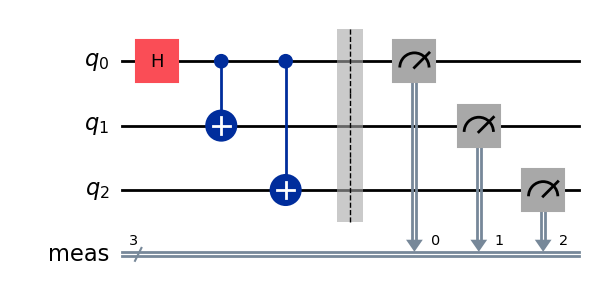

In [ ]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(0, 2)
circuit.measure_all()
circuit.draw("mpl")

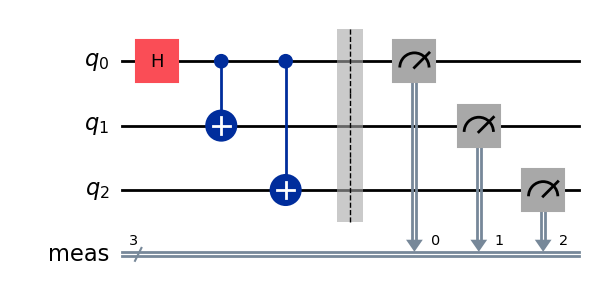

In [ ]:
from qiskit.compiler import transpile, assemble
trans_qc = transpile(circuit, backend)
trans_qc.draw("mpl")

In [ ]:
from qiskit.providers.jobstatus import JobStatus
import time

job = backend.run(trans_qc, shots=1024)

print("Job ID is", job.job_id(),"\n")

# 제출된 잡에 대한 실행 상태 확인
while job.status() is not JobStatus.DONE:
	print("Job status is", job.status() )
	time.sleep(2)
###while


print("Job status is", job.status() )

# 결과 출력
counts = job.result().get_counts()
print(counts)

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/debugpy/_vendored/pydevd/pydevd.py", line 1877, in set_suspend
    frame = None
    ^^^^^
RuntimeError: pyqir::values::Value is unsendable, but is being dropped on another thread
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/debugpy/_vendored/pydevd/pydevd.py", line 1877, in set_suspend
    frame = None
    ^^^^^
RuntimeError: pyqir::module::Module is unsendable, but is being dropped on another thread


Job ID is 47231730-522d-11f0-8ecd-0242ac1c000c 

Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.QUEUED
Job status is JobStatus.RUNNING
Job status is JobStatus.DONE
{'000': 512, '111': 512}


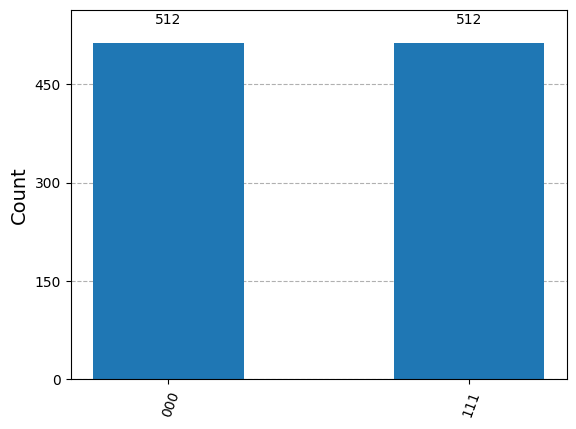

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(data=counts)